# Git basics

### 1. Change directory to your working directory
```bash
cd /Users/rcruces/git_repositories # << CHANGE this
```

### 2. Clone a repository
```bash
git clone https://github.com/rcruces/git-tutorial.git
```

### 3. Move to the directory 
```bash
cd git-tutorial
```

### 4. Create a branch (use a different name)
```bash
git checkout -b NewBranch
```

### 5. In which branch I am?

In [29]:
! git checkout -b NewBranch
! git branch

Switched to a new branch 'NewBranch'
* NewBranch
  main


### 6. Move to the NewBranch

In [30]:
! git checkout NewBranch

Already on 'NewBranch'


### 7. Create a new file with 10 random numbers (type whatever come to your mind)

In [59]:
! echo 24,45,76,90,32,34,23,1,7,18 > data/numbers_rrc.csv
! cat data/numbers_rrc.csv 
! tree

24,45,76,90,32,34,23,1,7,18
.
├── README.md
├── data
│   ├── README.md
│   └── numbers_rrc.csv
└── git_basics.ipynb

1 directory, 4 files


### 8. Check the status

In [52]:
! git status

On branch NewBranch
Your branch is up to date with 'origin/NewBranch'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	git_basics.ipynb

nothing added to commit but untracked files present (use "git add" to track)


### 9. Staging the changes

In [53]:
! git add data/numbers_rrc.csv
! git status

On branch NewBranch
Your branch is up to date with 'origin/NewBranch'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	git_basics.ipynb

nothing added to commit but untracked files present (use "git add" to track)


### 10. Commit your changes with a meaningful comment

In [54]:
! git commit -m "CREATE a new file with random numbers - rrc"

On branch NewBranch
Your branch is up to date with 'origin/NewBranch'.

Untracked files:
	git_basics.ipynb

nothing added to commit but untracked files present


### 11. Push your changes from your local workstation to the Remote repository (github)
For the first time your have to push the newbranch that you just create. Use the following command:

In [55]:
! git push --set-upstream origin NewBranch

Branch 'NewBranch' set up to track remote branch 'NewBranch' from 'origin'.
Everything up-to-date


### 12. Add 10 more number to your `data/numbers_<id>.csv` file

In [67]:
! echo $(cat data/numbers_rrc.csv),2,56,74,87,96,23,99,100,34,46 > tmp.txt && mv tmp.txt data/numbers_rrc.csv

### 13. Check all changes with `git status`

In [74]:
! git status

On branch NewBranch
Your branch is up to date with 'origin/NewBranch'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   data/numbers_rrc.csv

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	git_basics.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


### 14. Check a file changes with `git diff`

In [76]:
! git diff data/numbers_rrc.csv

diff --git a/data/numbers_rrc.csv b/data/numbers_rrc.csv
index 5c6a370..0ee17f1 100644
--- a/data/numbers_rrc.csv
+++ b/data/numbers_rrc.csv
@@ -1 +1 @@
-24,45,76,90,32,34,23,1,7,18
+24,45,76,90,32,34,23,1,7,18,2,56,74,87,96,23,99,100,34,46


### 15. Repeat: `add`, `commit`, `push`

In [79]:
! git add data/numbers_rrc.csv
! git commit -m "ADDED 10 more random number to my file data/numbers_rrc.csv"
! git push

On branch NewBranch
Your branch is up to date with 'origin/NewBranch'.

Untracked files:
	git_basics.ipynb

nothing added to commit but untracked files present
Everything up-to-date


# merge to main branch
### First let's see the log history

In [82]:
! git log --graph --decorate --oneline 

* e9b0c3b (HEAD -> NewBranch, origin/NewBranch) ADDED 10 more random number to my file data/numbers_rrc.csv
* efd7a8c CREATE a new file with random numbers - rrc
* c066bfd ADDED gitignore file
* 9b4ba20 (origin/main, origin/HEAD, main) Update README.md
*   f399eac Merge pull request #1 from rcruces/NewBranch
|\  
| * 94b8042 INITIAL commit of data, I added a README file
|/  
* 7864b1c Initial commit


### Now let's merge our branch to main

In [84]:
! git checkout main
! git pull origin main
! git merge NewBranch
! git push origin main

Already on 'main'
Your branch is up to date with 'origin/main'.
From https://github.com/rcruces/git-tutorial
 * branch            main       -> FETCH_HEAD
Already up to date.
Already up to date.
Everything up-to-date


In [85]:
! git log --graph --decorate --oneline 

* e9b0c3b (HEAD -> main, origin/main, origin/NewBranch, origin/HEAD, NewBranch) ADDED 10 more random number to my file data/numbers_rrc.csv
* efd7a8c CREATE a new file with random numbers - rrc
* c066bfd ADDED gitignore file
* 9b4ba20 Update README.md
*   f399eac Merge pull request #1 from rcruces/NewBranch
|\  
| * 94b8042 INITIAL commit of data, I added a README file
|/  
* 7864b1c Initial commit


## Homework
1. Create a new repository `<your_username>.github.io`
2. Follow the instructions here: https://pages.github.com
3. Deploy your personal webpage!
4. check your personal URL on a web browser: <your_username>.github.io
5. Check more templates: https://jekyllthemes.io/github-pages-themes

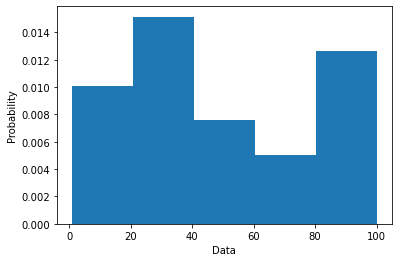

In [113]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import glob

# Read my data
data = np.genfromtxt('data/numbers_rrc.csv', delimiter=',')

# List all csv files
files = sorted(glob.glob('data/*.csv'))

# Read all files and stack them horizontally
for f in files:
    data = np.hstack((data, np.genfromtxt(f, delimiter=',')))

# Random numbers distribution
plt.hist(data, density=True, bins=5)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');